In [ ]:
#import google drive

from google.colab import drive
drive.mount('/content/gdrive')

#access MyDrive, directory where data csv is located

%cd /content/gdrive/MyDrive/

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
#all necessary imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from joblib import dump, load


%matplotlib inline

#read data in csv file and display some information

missing_value=["Undefined"]
old_df = pd.read_csv('day.csv', na_values=missing_value)
old_df.info()
old_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
old_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


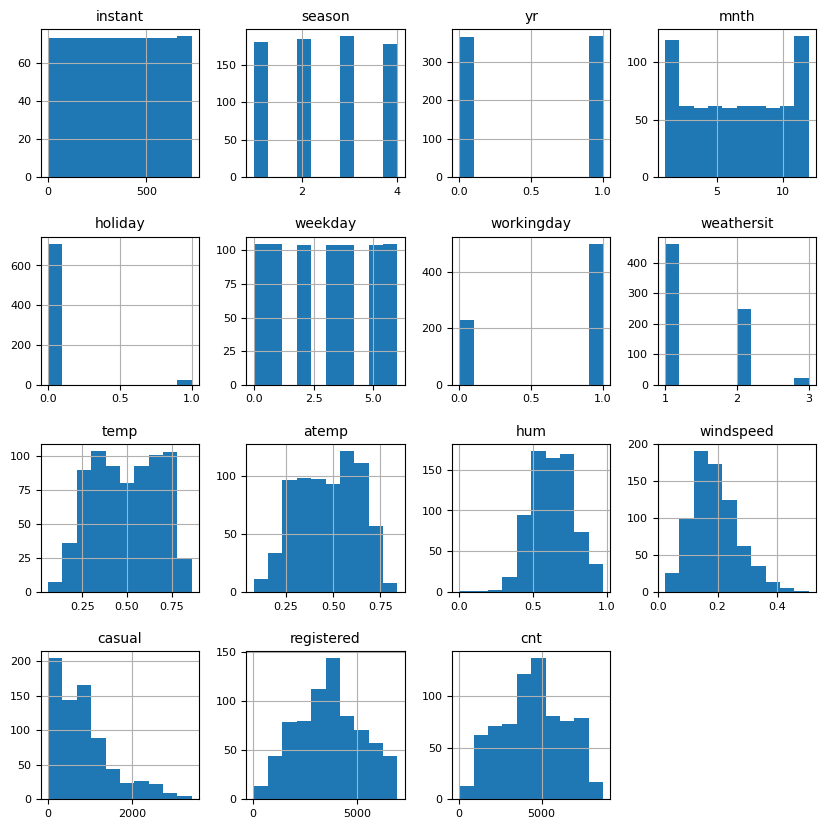

In [ ]:
old_df.info()
fig = old_df.hist(figsize=(10, 10), xlabelsize=8, ylabelsize=8) # Adjust figsize as needed
for ax in fig.ravel():
    ax.title.set_size(10)

plt.subplots_adjust(hspace=0.4)

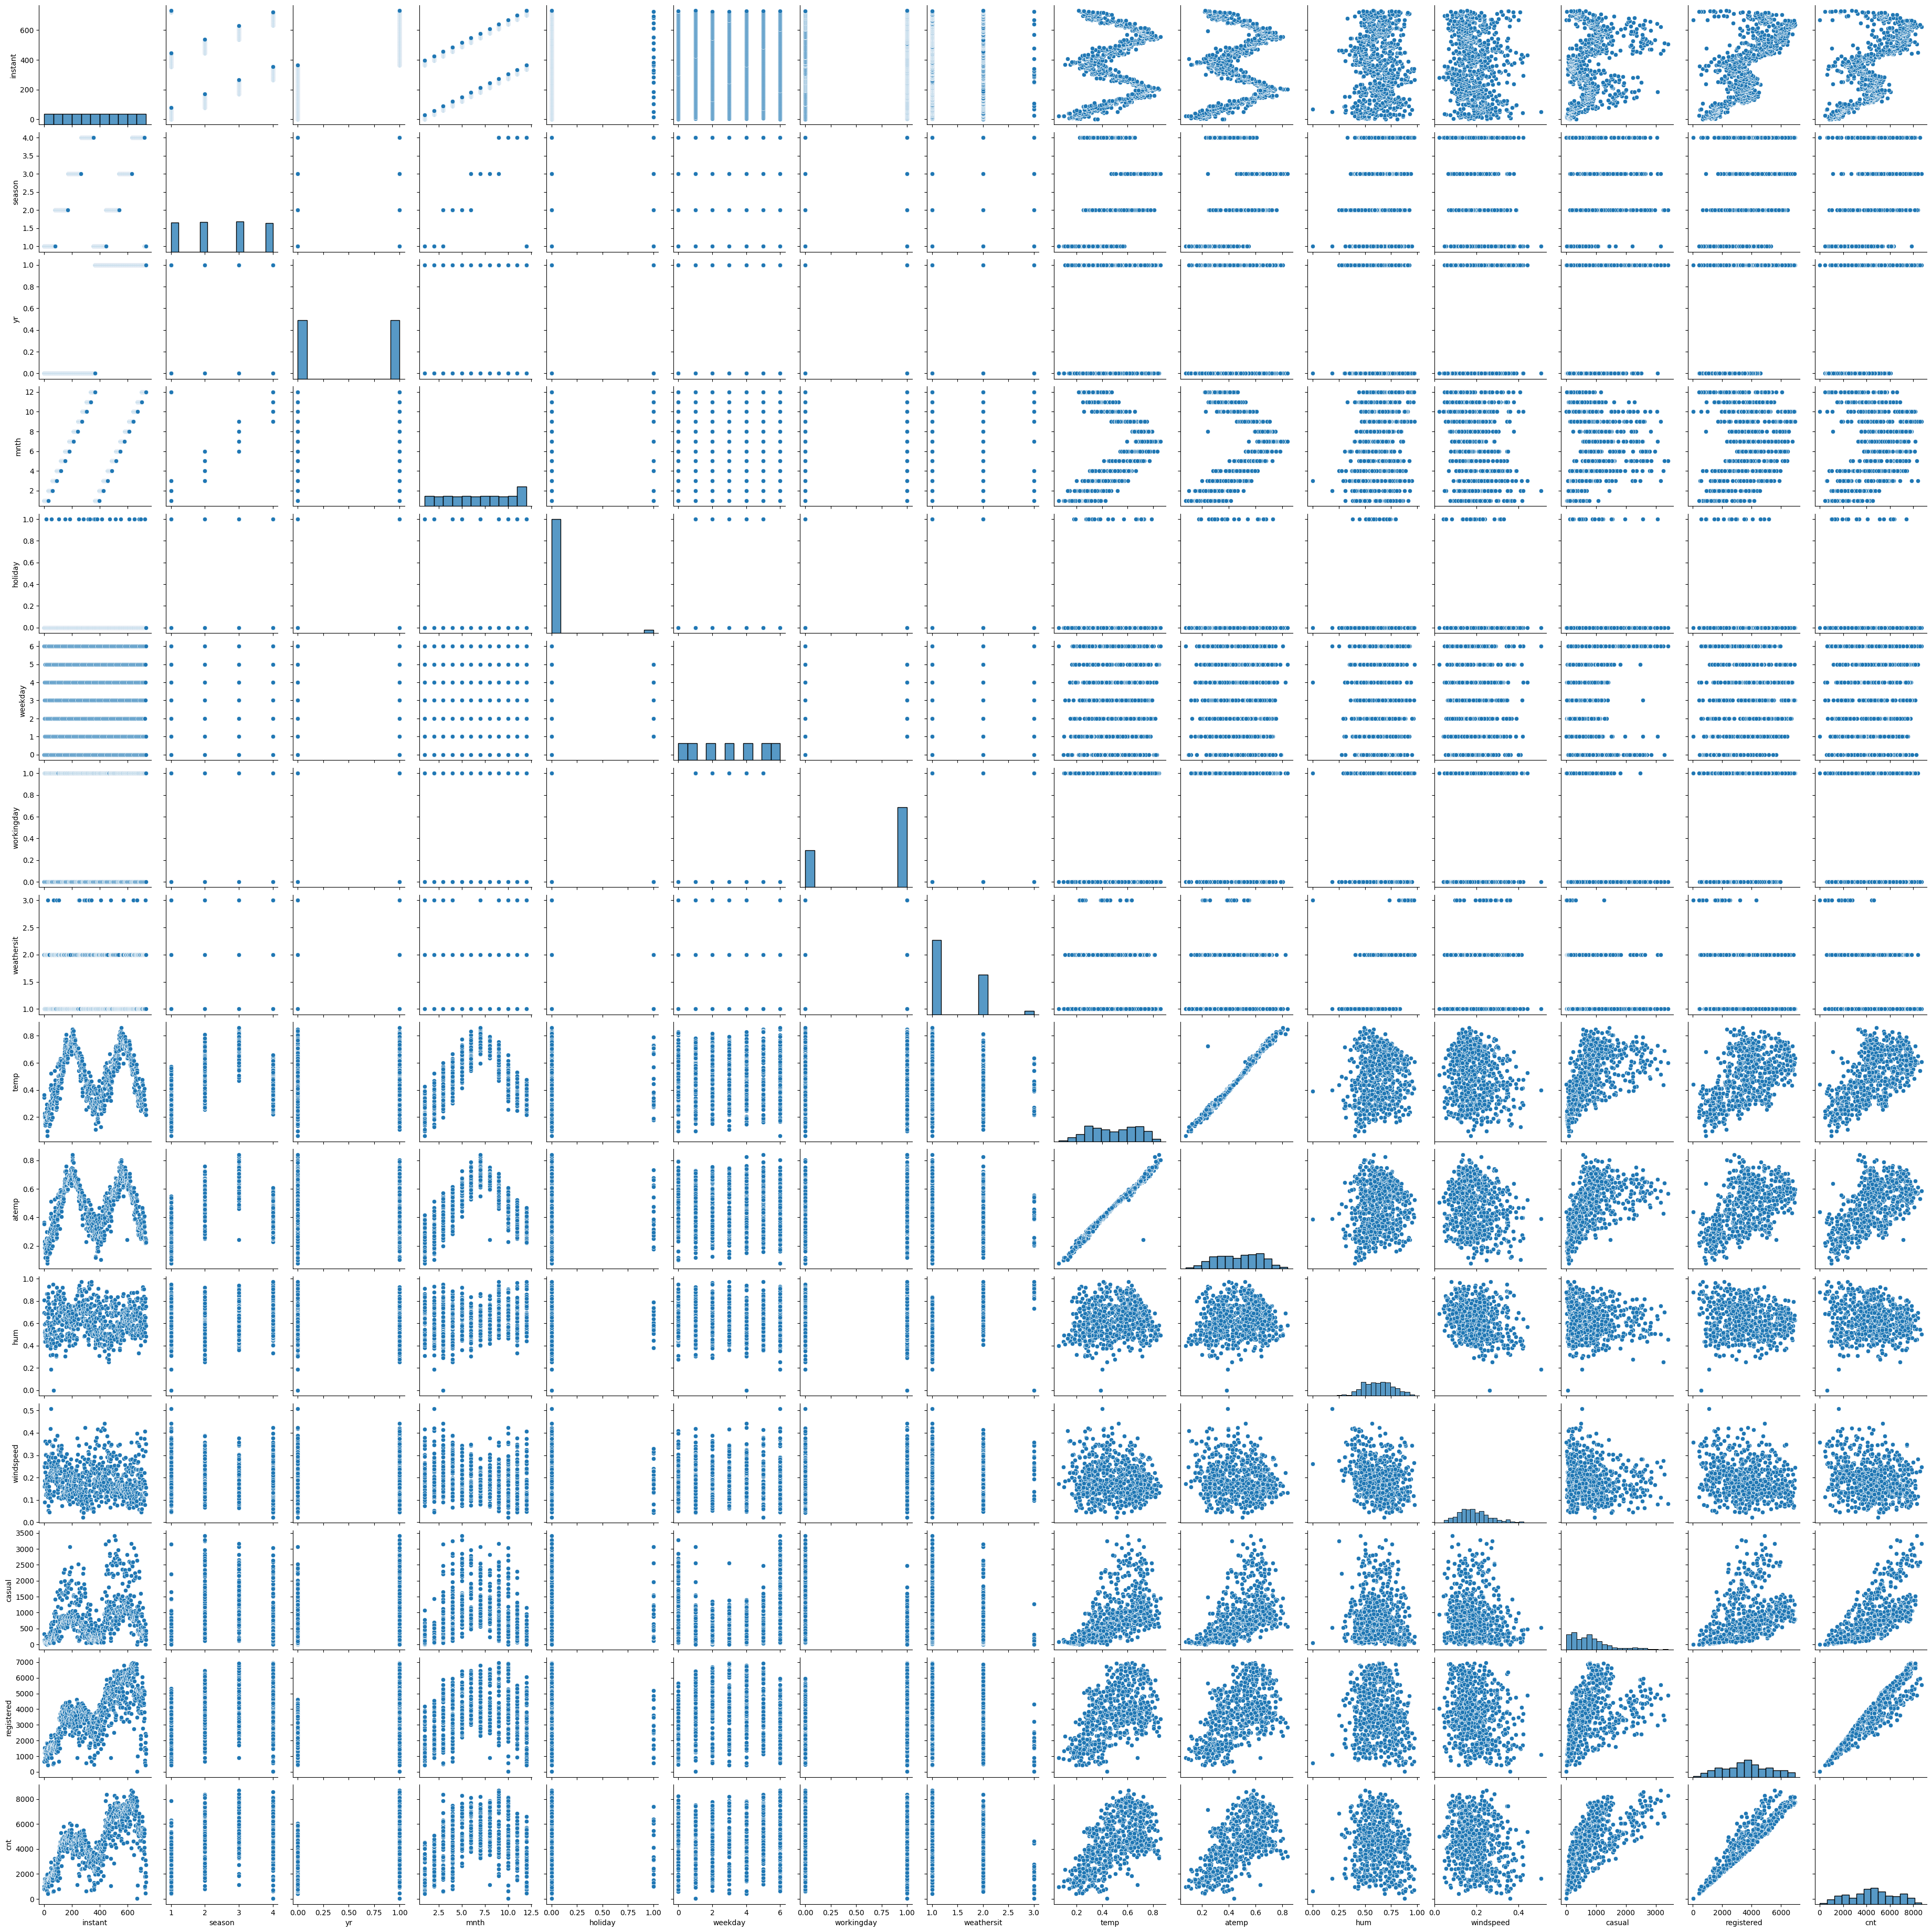

In [ ]:
sb.pairplot(old_df)

17 features, being Instant (ID variable), dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, and cnt.

In [ ]:
#dimensionality reduction

features = ['season', 'mnth', 'holiday', 'weekday', 'weathersit', 'atemp', 'windspeed', 'cnt', 'hum']

x_vars = ['season', 'mnth', 'holiday', 'weekday', 'weathersit', 'atemp', 'windspeed', 'hum']

target = 'cnt'

df = old_df[features]
df.head()

,season,mnth,holiday,weekday,weathersit,atemp,windspeed,cnt,hum
0,1,1,0,6,2,0.363625,0.160446,985,0.805833
1,1,1,0,0,2,0.353739,0.248539,801,0.696087
2,1,1,0,1,1,0.189405,0.248309,1349,0.437273
3,1,1,0,2,1,0.212122,0.160296,1562,0.590435
4,1,1,0,3,1,0.229270,0.186900,1600,0.436957


In [ ]:
duplicate = df[df.duplicated()]

In [ ]:
print(duplicate)
# No duplicates

Empty DataFrame
Columns: [season, mnth, holiday, weekday, weathersit, atemp, windspeed, cnt, hum]
Index: []


In [ ]:
#normalize/scale the data to prepare for model building
scaler = MinMaxScaler()
df[x_vars] = scaler.fit_transform(df[x_vars])
df[features].head()

<ipython-input-7-e0a121c274d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x_vars] = scaler.fit_transform(df[x_vars])


,season,mnth,holiday,weekday,weathersit,atemp,windspeed,cnt,hum
0,0.0,0.0,0.0,1.000000,0.5,0.373517,0.284606,985,0.828620
1,0.0,0.0,0.0,0.000000,0.5,0.360541,0.466215,801,0.715771
2,0.0,0.0,0.0,0.166667,0.0,0.144830,0.465740,1349,0.449638
3,0.0,0.0,0.0,0.333333,0.0,0.174649,0.284297,1562,0.607131
4,0.0,0.0,0.0,0.500000,0.0,0.197158,0.339143,1600,0.449313


In [ ]:
#split into test and training data, 80/20 split]
x_vars = ['season', 'mnth', 'holiday', 'weekday', 'weathersit', 'atemp', 'windspeed', 'hum']

target = 'cnt'

X = df[x_vars]
y = df[target]

#X = df[x_vars].values.reshape(-1,1)
y = df[target].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (548, 8)
X_test shape: (183, 8)
y_train shape: (548, 1)
y_test shape: (183, 1)


[0.41678477 0.20641114 0.15377303 0.07422544 0.05939709 0.04332446
 0.03052484 0.01555925]


Text(0, 0.5, 'Cumulative Explained Variance')

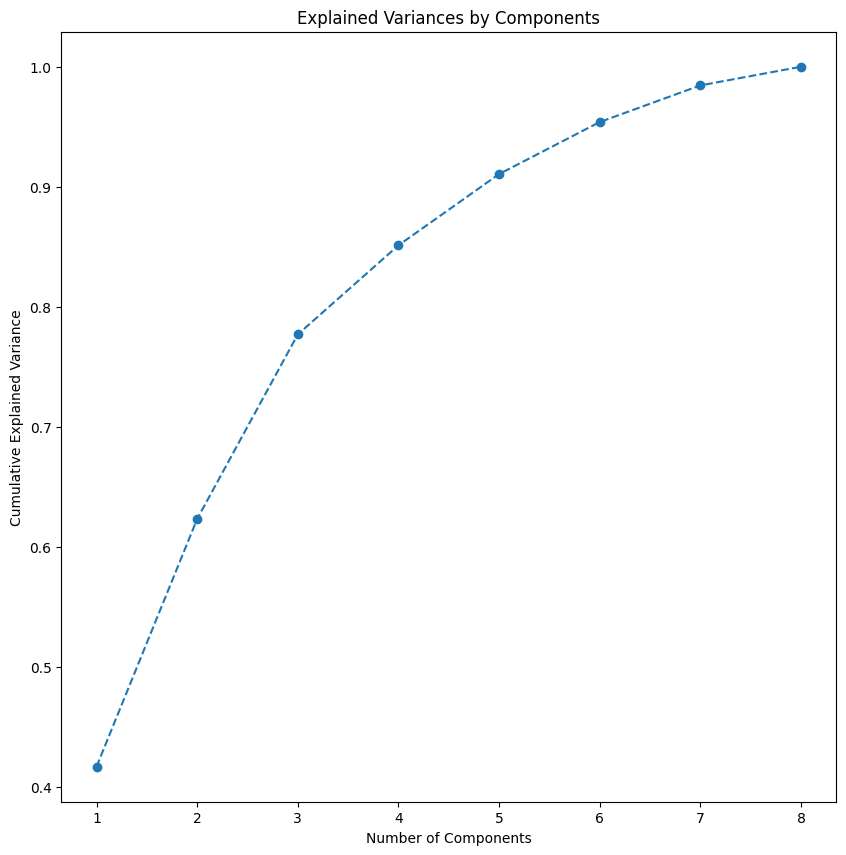

In [ ]:
# visualizing the explained variance by individual components
pca = PCA(n_components=8, whiten = False, random_state = 2019)
pca.fit(X_train)
print (pca.explained_variance_ratio_)
X_pca=pca.transform(X_train)


plt.figure(figsize = (10,10))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
# finding the least number of components that can explain more than 90% variance
sum = 0
for i in range(len(pca.explained_variance_ratio_)):
  sum = sum + pca.explained_variance_ratio_[i]
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", i+1)
    break

Number of PCs that explain at least 90% variance:  5


[0.41678477 0.20641114 0.15377303 0.07422544 0.05939709]
X_test_pca: [[-3.14103229e-01  2.22459264e-01  8.02764372e-01 -9.39568231e-03
  -1.86769175e-02]
 [ 2.57603477e-01 -1.14584001e-02 -1.93426655e-01 -1.51218735e-01
  -1.83939094e-02]
 [-6.27026295e-01 -5.06858803e-01  3.06772577e-01  4.29096329e-01
  -6.60983662e-02]
 [ 6.28357925e-01 -1.52886115e-01  5.83179574e-01  1.05127762e-01
  -6.82870869e-03]
 [ 7.29510996e-01 -3.31708869e-01 -1.35752016e-01  9.47782115e-03
  -1.26950879e-02]
 [-1.81556935e-01 -3.70812920e-01 -2.76598985e-01 -1.88767312e-01
   7.92370715e-03]
 [-3.36223899e-01 -1.34690555e-01  3.60124789e-01 -1.29771099e-01
   1.76315151e-02]
 [-5.34910324e-01 -3.48389496e-02 -2.28486215e-01 -4.49725297e-02
  -5.71408707e-02]
 [ 6.78761645e-01  1.49425858e-01 -2.32399485e-01  6.16196391e-02
  -5.73583721e-02]
 [ 2.85929270e-01 -5.14752150e-01 -1.77285509e-01 -6.47452794e-02
   6.11851967e-03]
 [ 2.40269429e-01 -3.64273040e-01 -2.46551225e-01 -3.10543186e-02
  -8.83441809e-

Text(0.5, 1.0, 'Linear Regression of Bike Model')

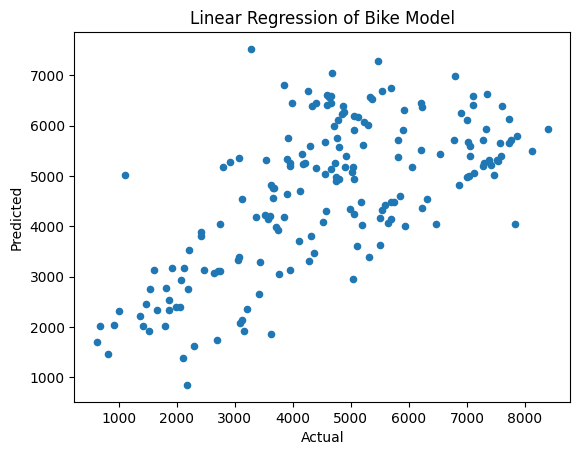

In [ ]:
#PCA

pca = PCA(n_components=5, whiten = False, random_state = 2019)
pca.fit(X_train)
print(pca.explained_variance_ratio_)

X_pca=pca.transform(X_train)
X_pca_reconst = pca.inverse_transform(X_pca)

X_test_pca =pca.transform(X_test)
print("X_test_pca:", X_test_pca)

lin_reg = LinearRegression()
my_mdl = lin_reg.fit(X_pca,y_train)
my_pred = lin_reg.predict(X_test_pca)
print("my_pred", my_pred)

print('y_test flatten type:', type(y_test.flatten()))

testdf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': my_pred.flatten()})
testdf.plot.scatter(x='Actual', y='Predicted')
plt.title("Linear Regression of Bike Model")

In [ ]:
def mdl_metrics(arg1,arg2):
    #arg1 = true values
    #arg2 = predicted valas
    print('Mean Absolute Error:', metrics.mean_absolute_error(arg1, arg2))
    print('Mean Squared Error:', metrics.mean_squared_error(arg1, arg2))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(arg1, arg2)))
    return

In [ ]:
print(lin_reg.score(X_test_pca,y_test))

mdl_metrics(y_test,my_pred)

0.41615934739523996
Mean Absolute Error: 1199.959740807335
Mean Squared Error: 2004102.4086129386
Root Mean Squared Error: 1415.6632398324605


In [ ]:
'''
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scale = StandardScaler()


#rewrite for linear regression
pipe = Pipeline(steps=[('scale',scale), ('pca', pca),('lienar',lin_reg)])

param_grid = {
    'pca__n_components': [1,2,3,4,5,6,7,8],
    #'logistic__C': np.logspace(-4,4, 8)
    #line of code above tests the parameter c with 8 possible numbers evenly spaced between 10^4 and 10^-4
}

search = GridSearchCV(pipe, param_grid, n_jobs = -1, cv=5)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

linear_mdl = pipe.fit(X_train, y_train)


SyntaxError: incomplete input (<ipython-input-14-75701b5ca637>, line 1)

In [ ]:
# Save your model as a .pkl file

dump(my_mdl,'bike_sharing_model.pkl')

['bike_sharing_model.pkl']

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.3 MB/s eta 0:00:00


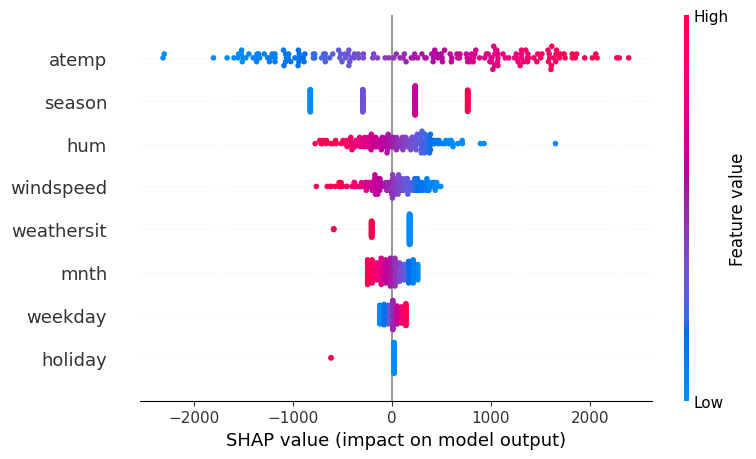

In [ ]:
# Import necessary libraries
import shap
from sklearn.linear_model import LinearRegression

# Define a surrogate model (e.g., Linear Regression) compatible with SHAP
surrogate_model = LinearRegression()

# Train the surrogate model on your data (X_train, y_train)
surrogate_model.fit(X_train, y_train)

# Create a SHAP explainer with the surrogate model
explainer = shap.Explainer(surrogate_model, X_train)

# Calculate SHAP values for the predictions
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Visualize individual predictions with force plots
# For example, visualize the SHAP values for the first prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0,:])


In [ ]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
